In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris

In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))
    t_1hot=np.empty([len(t_indices),N])
    for t in range(len(t_indices)):
        l=np.zeros(N)
        l[t_indices[t]]=1
        t_1hot[t]=l
    ### WRITE YOUR CODE HERE - 2 MARKS

    return t_1hot

In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

Test passed 👍


In [5]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
    index = np.arange(len(X))
    np.random.shuffle(index)
    Nsamples = X.shape[0]
    Nsamples_test = int(testFraction*Nsamples)
    index_test = index[:Nsamples_test]
    index_train = index[Nsamples_test:]
    X_train = np.zeros((len(index_train),len(X[0])))
    X_test = np.zeros((len(index_test),len(X[0])))
    t_train = np.zeros((len(index_train),len(t[0])))
    t_test = np.zeros((len(index_test),len(t[0])))
    for i in range(len(index_test)):
        X_test[i] = X[index_test[i]]
        t_test[i] = t[index_test[i]]
    
    for i in range(len(index_train)):
        X_train[i] = X[index_train[i]]
        t_train[i] = t[index_train[i]]
    
    return X_train, t_train, X_test, t_test

In [6]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [7]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''
    mean_test = np.mean(X_test,axis = 0)
    mean_train = np.mean(X_train, axis= 0)
    std_test = np.std(X_test,axis=0)
    std_train = np.std(X_train,axis=0)
    X_train_normalized = (X_train-mean_train)/std_train
    X_test_normalized = (X_test-mean_train)/std_train
    ### WRITE YOUR CODE HERE - 2 MARKS

    return X_train_normalized, X_test_normalized

In [8]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 3.,3.,3.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [9]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    y = 1/(1+np.exp(-x))
    ### WRITE YOUR CODE HERE - 1 MARKS

    return y

In [10]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [11]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''
    div = sum(np.exp(x))
    y = np.exp(x)/div
    ### WRITE YOUR CODE HERE - 1 MARKS

    return y

In [12]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [13]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''
    y = (x)*(1-x)
    ### WRITE YOUR CODE HERE - 1 MARKS

    return y

In [14]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''
        self.weights1 =2*np.random.rand(self.nh,self.ni+1)-1
        self.weights2 =2*np.random.rand(self.no,self.nh+1)-1
         ### WRITE YOUR CODE HERE - 2 MARKS

    
    def predict(self, x):
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v = v1
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 
        x1 = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x1)
        v1 = sigmoid(h1)
        v = v1
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        
        v2=v2.reshape((3,1))
        v=v.reshape((5,1))
        y=y.reshape((3,1))
        bias1 = self.weights1[:,:1]
        bias2 = self.weights2[:,:1]
        w1 = self.weights1[:,1:]
        w2 = self.weights2[:,1:]
        del_weights2 = (y-v2).dot(v.T)
        del_weights1 = sigmoid_derivative(v)*(w2.T.dot(y-v2))
        
        bias2 = bias2 + eta*(y-v2)
        bias1 = bias1 + eta*del_weights1
        
        w1 = w1 + eta*del_weights1*(x.T)
        w2 = w2 + eta*del_weights2
        
        self.weights1 = np.append(bias1,w1,axis=1)
        self.weights2 = np.append(bias2,w2,axis=1)
        
        loss_val = (y*np.log(v2)).sum()
        return loss_val
        
        ### WRITE YOUR CODE HERE - 5 MARKS


    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''
        loss = np.zeros(epochs)
        self.init_weights()
        number_of_samples = X.shape[0]
        for i in range(number_of_samples):
            for j in range(epochs):
                x = X[i,:].T
                y = t[i,:].T
                loss_val = self.backprop(x,y,eta)
                loss[j] = loss[j]-loss_val
        ### WRITE YOUR CODE HERE - 5 MARKS
        
        loss=loss/(len(X))
        return self.weights2, loss
        
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''
        y = np.zeros((len(x),1))
        for i in range(len(x)):
            v2 = self.predict(x[i])
            y[i][0] = np.argmax(v2)
        ### WRITE YOUR CODE HERE - 1 MARKS

        return y

In [15]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''
    CM = np.zeros((3,3))
    for i in range(len(y)):
        CM[int(t[i][0])][int(y[i][0])] = CM[int(t[i][0])][int(y[i][0])] + 1
    ### WRITE YOUR CODE HERE - 3 MARKS

    return CM

In [16]:
def predict_act(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i][0] = np.argmax(t[i])
        
    return y

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

(150, 4)
(150,)
[[ 8.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  1. 11.]]


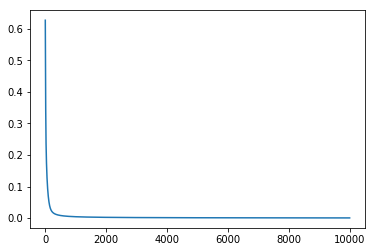

In [17]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,y=loadIrisData()
    y_hot = one_hot_encoding(y,3)
    X_train, y_hot_train, X_test, y_hot_test = splitData(X,y_hot,0.2)
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    ni = X.shape[1]
    no = 3
    nh = 5
    ni = 4
    NN = NeuralNetwork(ni,nh,no)
    weights2, Loss=NN.fit(X_train_normalized, y_hot_train,0.01,10000)
    labels = np.empty([X_test.shape[0],1])
    t = np.empty([X_test.shape[0],1])
    labels = NN.predict_label(X_test_normalized)
    t = predict_act(y_hot_test)
    print(getCM(labels,t))
    plt.plot(Loss)
if __name__=="__main__":
    experiment()